In [171]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import viz_kmeans
import wrangle
from pydataset import data

np.set_printoptions(suppress=True)

In [172]:
# Useful functions I used:


def create_cluster(train, X, k):
    # takes in train, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 539)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    train['cluster'] = kmeans.predict(X_scaled)
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return train, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,train,kmeans, X_scaled, scaler):
    # takes in x and y (variable names as strings, along with returned objects from previous
    # fuction create_cluster and creates a plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

### 1.Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.
Visualize the results of your clustering.
Use the elbow method to visually select a good value for k.
Repeat the clustering, this time with 3 different features.

In [173]:
from sklearn.cluster import KMeans

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [174]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [175]:
# we will create cluster on two features
X = iris[['petal_width', 'sepal_width']]

In [176]:
# scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [177]:
X_scaled.head()

,petal_width,sepal_width
1,-1.315444,1.019004
2,-1.315444,-0.131979
3,-1.315444,0.328414
4,-1.315444,0.098217
5,-1.315444,1.249201


In [178]:
# use sklearn Kmeans algorithm to create clusters:


kmeans = KMeans(n_clusters = 3)

kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [179]:
# create new columns:

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [180]:
# modify column name for cluster

iris['cluster'] = 'cluster_' + iris['cluster'].astype(str)

In [181]:
# modify column name for cluster

X_scaled['cluster'] = 'cluster_' + X_scaled['cluster'].astype(str)

In [182]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


In [183]:
# Centriods for unscaled data

centroids = iris.groupby('cluster')['petal_width', 'sepal_width'].mean()
centroids

,petal_width,sepal_width
cluster,,
cluster_0,1.937037,3.090741
cluster_1,0.244898,3.451020
cluster_2,1.346809,2.608511


In [184]:
# Centriods for scaled data

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width
0,0.971055,0.076903
1,-1.256344,0.906255
2,0.194125,-1.033175


#### b. Visualize the results

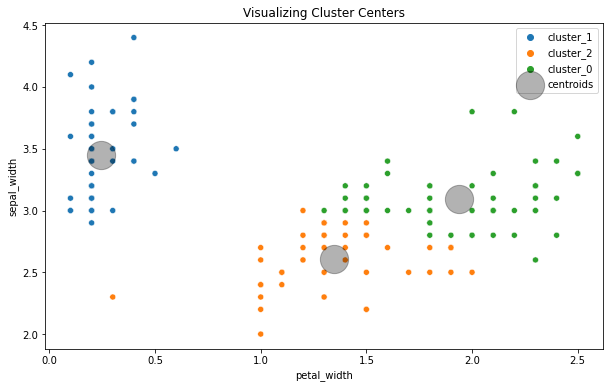

In [186]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = iris, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

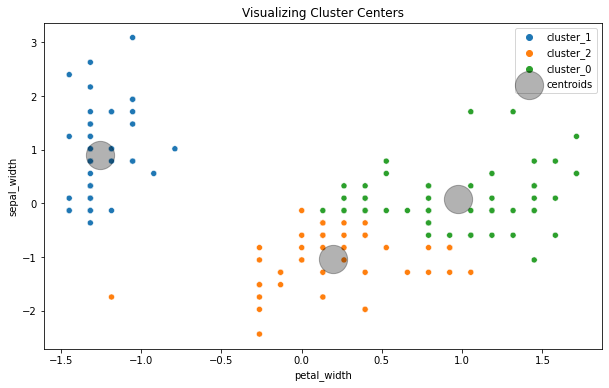

In [187]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

Text(0.5, 1.0, ' Actual species')

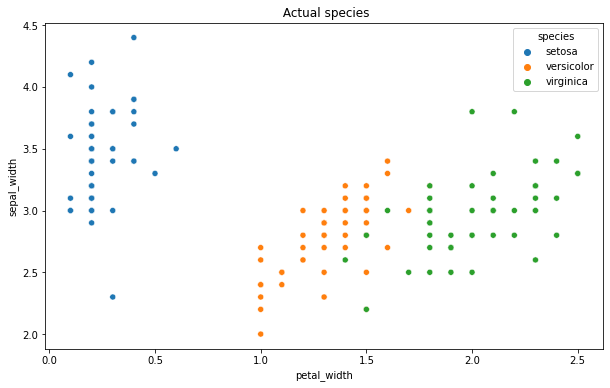

In [188]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = iris, hue = 'species')
plt.title(' Actual species')

#### c. Use the elbow method to visually select a good value for k.

In [189]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

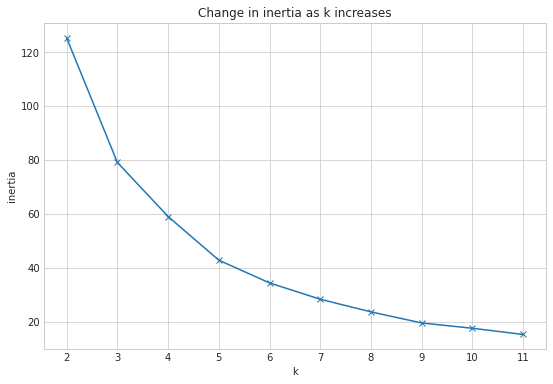

In [190]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### d. Repeat the clustering, this time with 3 different features.

In [191]:
# let's use petal_length, sepal_length and petal_width for clustering

X = iris[['petal_length', 'sepal_length', 'petal_width']]

#lets use functions we had created earlier to create clusters and visualize 
iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)

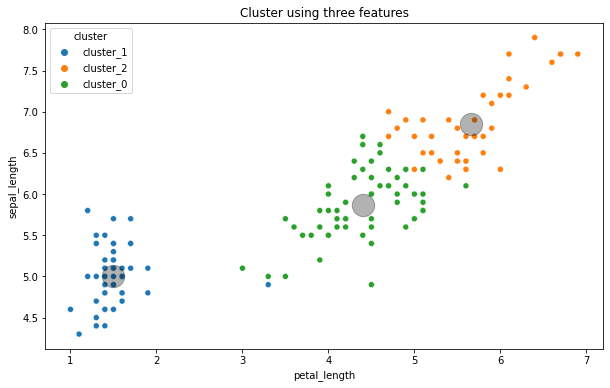

In [192]:
create_scatter_plot('petal_length','sepal_length',iris,kmeans, X_scaled, scaler)
plt.title('Cluster using three features');

Text(0.5, 1.0, 'Actual Species')

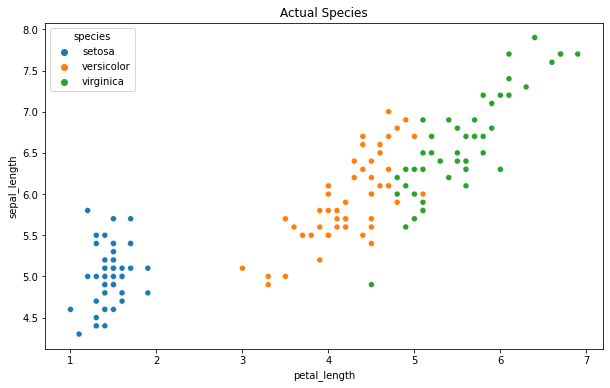

In [193]:
# lets look at scatter plot for actual species
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = iris, hue = 'species')
plt.title('Actual Species')

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [203]:
df = wrangle.wrangle_mall_df()

In [204]:
df.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [205]:
# let's explore based on annual_income and spending score

X = df[['annual_income', 'spending_score']]

In [206]:
X.head(3)

,annual_income,spending_score
customer_id,,
1,15,39
2,15,81
3,16,6


In [207]:
# Lets create a scaled dataframe

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,annual_income,spending_score
1,-1.779171,-0.435989
2,-1.779171,1.199413
3,-1.739447,-1.720949
4,-1.739447,1.043661
5,-1.699723,-0.397051


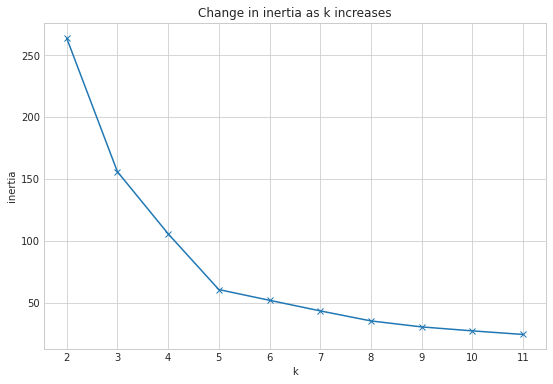

In [208]:
# let is explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

**The elbow chart above seems to suggest that '5' might be a good value for k**

In [209]:
# Sklearn Kmeans implementation

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4],
      dtype=int32)

In [210]:
kmeans.labels_

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4],
      dtype=int32)

In [211]:
# make a new column called 'cluster' in X_scaled dataframe
X_scaled['cluster'] = kmeans.labels_

In [212]:
df['cluster'] = kmeans.labels_
df.head()

,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,
1,19,15,39,1,1
2,21,15,81,1,2
3,20,16,6,0,1
4,23,16,77,0,2
5,31,17,40,0,1


In [213]:
# convert cluster column values to string to avoid seaborn hue color issue

X_scaled['cluster'] = 'cluster_' + X_scaled['cluster'].astype(str)
df['cluster'] = 'cluster_' + df['cluster'].astype(str)

In [214]:
#scaled centroids
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,annual_income,spending_score
0,-0.186720,-0.018864
1,-1.330113,-1.140262
2,-1.353037,1.135696
3,1.054880,-1.270379
4,1.009899,1.242450


In [215]:
# unscaled centroids
centroids = df.groupby('cluster')['annual_income', 'spending_score'].mean()
centroids

,annual_income,spending_score
cluster,,
cluster_0,55.087500,49.712500
cluster_1,26.304348,20.913043
cluster_2,25.727273,79.363636
cluster_3,86.342857,17.571429
cluster_4,85.210526,82.105263


<Figure size 1008x648 with 0 Axes>

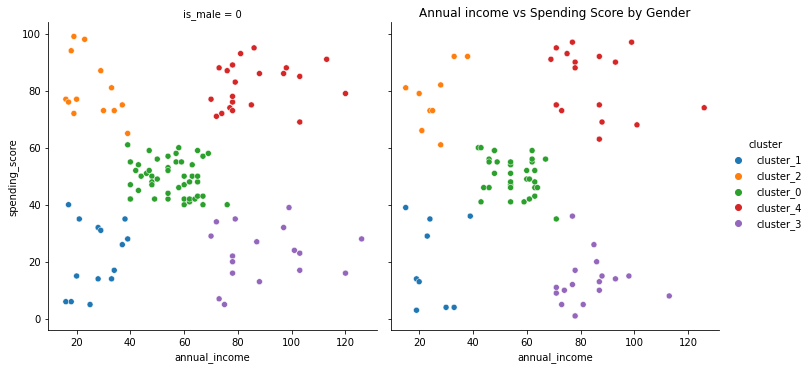

In [217]:
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.relplot(x = 'annual_income', y = 'spending_score', data = df, hue = 'cluster', col = 'is_male')

plt.title('Annual income vs Spending Score by Gender');

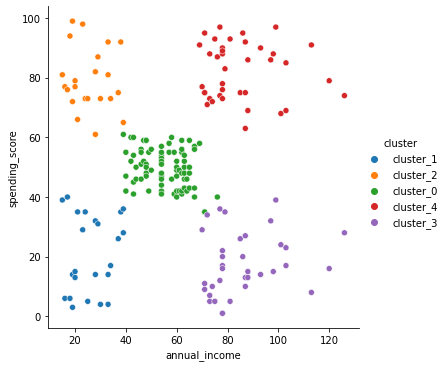

In [218]:
sns.relplot(x = 'annual_income', y = 'spending_score', data = df, hue = 'cluster')

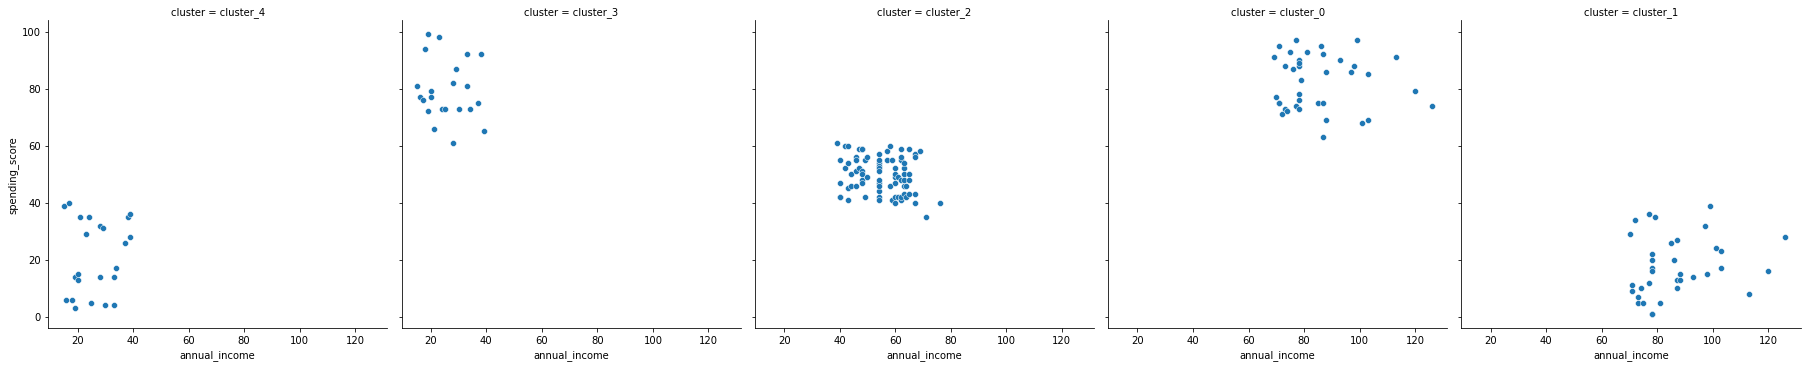

In [38]:

sns.relplot(x = 'annual_income', y = 'spending_score', data = df, col = 'cluster')

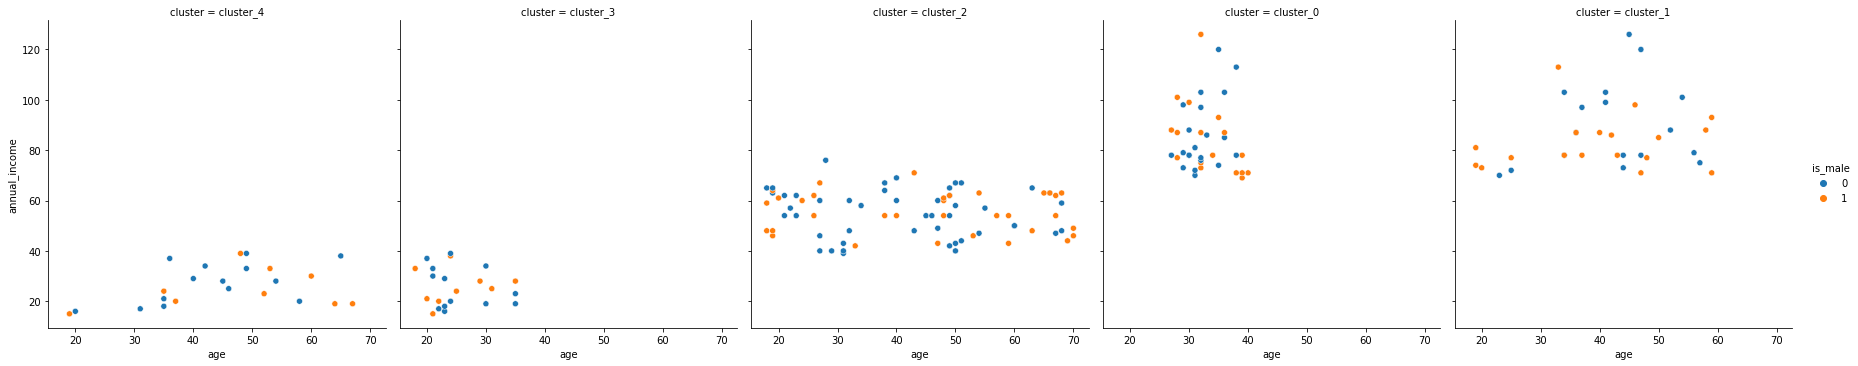

In [39]:
# lets visualize clusters by age and annual income 
sns.relplot(x = 'age', y = 'annual_income', data = df, col = 'cluster', hue = 'is_male')

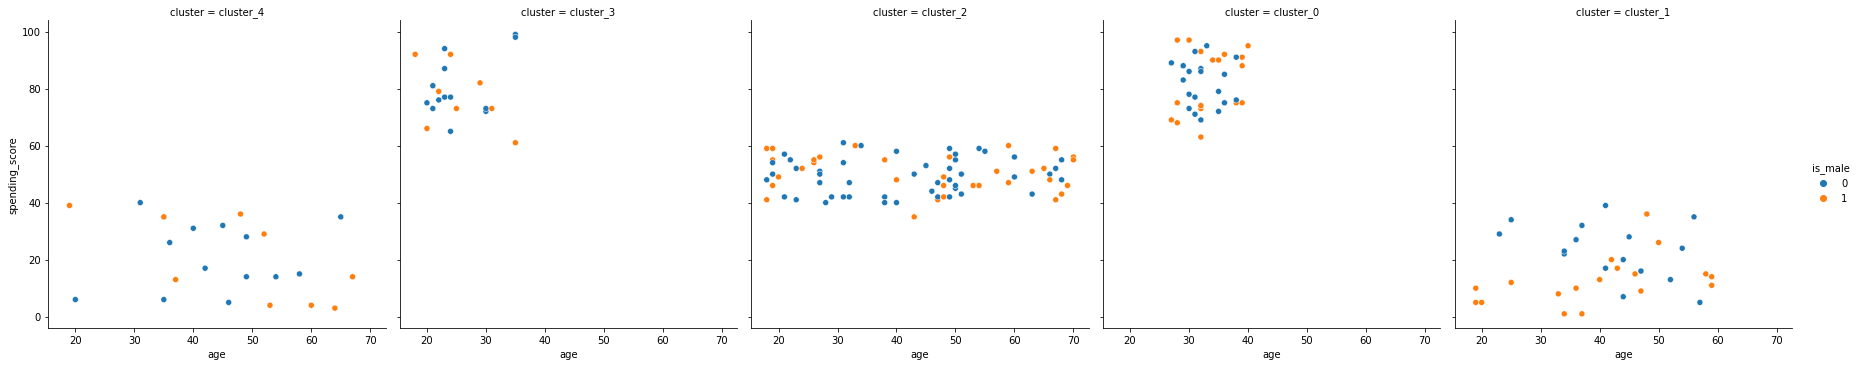

In [40]:
# lets visualize clusters by age and spending score
sns.relplot(x = 'age', y = 'spending_score', data = df, col = 'cluster', hue = 'is_male')

### Customer profiles based on visuals above:

#### Cluster 0: (Millennials with high income, high spending score)
- Age: 30s and 40s('millennials')
- Upper half of income range
- Higher spending score

#### Cluster 1: (lower-middle income/ average spenders)
- All age ranges
- average income range
- average spending score

#### Cluster 2: (high income/low spenders)
- All age ranges
- upper half of income range
- lower spending score

#### Cluster 3: (low income/low spenders)
- All age ranges
- lower half of income range
- lower spending

#### Cluster 4: (Young, low income/ high spenders)
- 20-35s age range
- lower income range
- high spending score

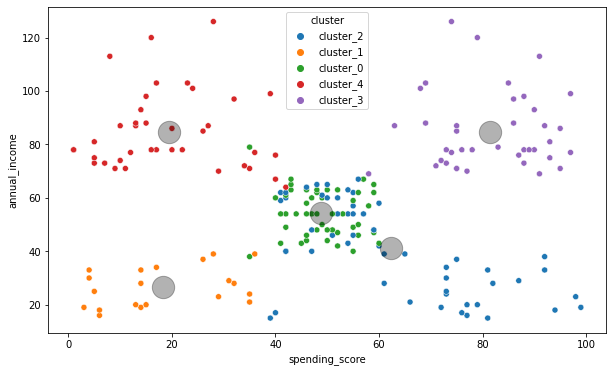

In [219]:
# clustering using annual income, age and spending score

X = df[['annual_income', 'age','spending_score']]
train, X_scaled, scaler, kmeans, centroids = create_cluster(df, X, 5)
create_scatter_plot('spending_score','annual_income',train, kmeans, X_scaled, scaler)

In [220]:
colors = ['#DF2020','#2095DF', '#81DF20', 'm', 'b' ]
df['c'] = df.cluster.map({'cluster_0':colors[0], 'cluster_1':colors[1], 'cluster_2':colors[2], 'cluster_3':colors[3],'cluster_4':colors[4]})

In [221]:
df.head()

,age,annual_income,spending_score,is_male,cluster,c
customer_id,,,,,,
1,19,15,39,1,cluster_2,#81DF20
2,21,15,81,1,cluster_2,#81DF20
3,20,16,6,0,cluster_1,#2095DF
4,23,16,77,0,cluster_2,#81DF20
5,31,17,40,0,cluster_2,#81DF20


In [222]:
# from mpl_toolkits import mplot3d
# %matplotlib inline
# ax = plt.axes(projection='3d')
# ax.scatter3D(df.annual_income, df.age, df.spending_score, c = df.c);

<IPython.core.display.Javascript object>


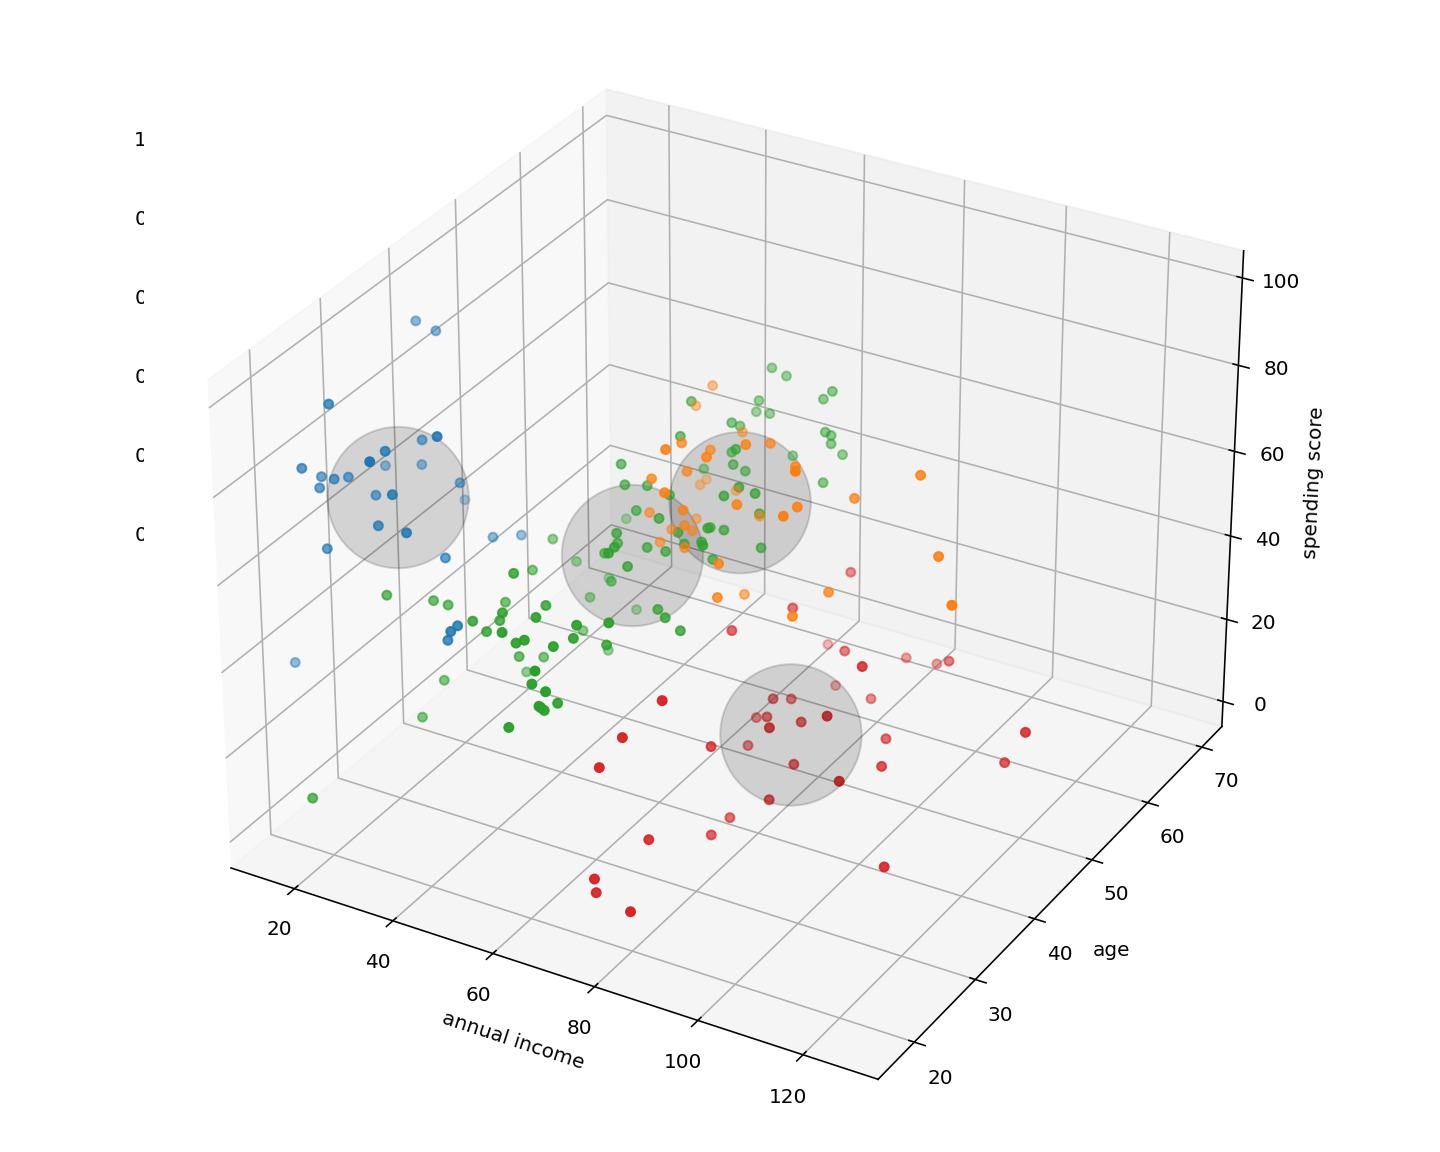

In [223]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

X = df[['age', 'annual_income', 'spending_score']]
fig = plt.figure(figsize=(10, 8))
for i, k in enumerate([4]):
    plt.subplot(2, 2, i + 1)
    ax = Axes3D(fig)
    kmeans = KMeans(k)
    kmeans.fit(X)
    df['clusters'] = kmeans.predict(X)
    df.clusters = 'cluster' + df.clusters.astype(str)
    for clusters, subset1 in df.groupby('clusters'):
        ax.scatter(subset1.annual_income, subset1.age, subset1.spending_score, label='cluster')
        plt.xlabel('annual income')
        plt.ylabel('age')
        ax.set_zlabel('spending score')
        #plt.zlabel('spending score')
        plt.title(k)
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    ax.scatter(centroids.annual_income, centroids.age, centroids.spending_score, alpha=.15, s=5000, c='black')
    #centroids.plot.scatter(y='age', x='annual_income', ax=plt.gca(), alpha=.15, s=5000, c='black')
    plt.title(f'k = {k}')

### How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [224]:
X = df[['annual_income', 'spending_score', 'age']]
kmeans = KMeans(5)
kmeans.fit(X)
df['clusters'] = kmeans.predict(X)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

<Figure size 1008x648 with 0 Axes>

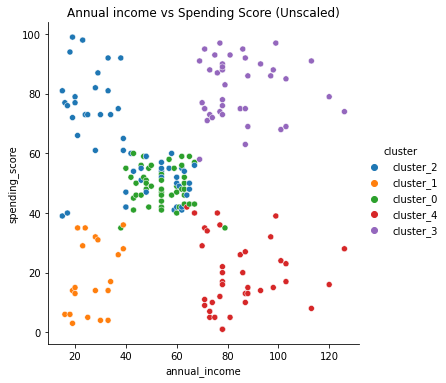

In [225]:
%matplotlib inline
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.relplot(x = 'annual_income', y = 'spending_score', data = df, hue = 'cluster')

plt.title('Annual income vs Spending Score (Unscaled)');

In [226]:
X = df[['annual_income', 'spending_score', 'age']]

# scale the data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

# sklearn Kmeans 
kmeans = KMeans(5)
kmeans.fit(X_scaled)
df['clusters'] = kmeans.predict(X_scaled)
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)


<Figure size 1008x648 with 0 Axes>

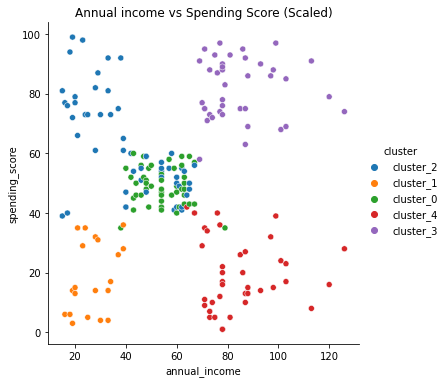

In [227]:
%matplotlib inline
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.relplot(x = 'annual_income', y = 'spending_score', data = df, hue = 'cluster')

plt.title('Annual income vs Spending Score (Scaled)');

### Effect of scaling: Zillow 

In [247]:
# acquire the data

zillow = wrangle.wrangle_zillow()

In [248]:
zillow.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
0,10711855,2.0,3.0,8.0,2107.0,6037.0,34222559.0,-118617387.0,9158.0,6.037113e+07,...,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,-0.007357,2017-07-07,Central,Los_Angeles
1,10711877,2.0,4.0,8.0,1882.0,6037.0,34220261.0,-118616409.0,9035.0,6.037113e+07,...,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,0.021066,2017-08-29,Central,Los_Angeles
2,10711888,2.0,4.0,8.0,1882.0,6037.0,34222491.0,-118616854.0,9800.0,6.037113e+07,...,1972.0,257591.0,542923.0,2016.0,285332.0,6673.24,0.077174,2017-04-04,Central,Los_Angeles
3,10711910,2.0,3.0,8.0,1477.0,6037.0,34221864.0,-118615739.0,11285.0,6.037113e+07,...,1960.0,57968.0,78031.0,2016.0,20063.0,1116.46,-0.041238,2017-03-17,Central,Los_Angeles
4,10711923,2.0,4.0,8.0,1918.0,6037.0,34220619.0,-118615253.0,11239.0,6.037113e+07,...,1960.0,167869.0,415459.0,2016.0,247590.0,5239.85,-0.009496,2017-03-24,Central,Los_Angeles


<AxesSubplot:>

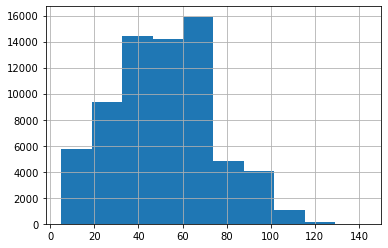

In [249]:
# make a new feature: age of the house
zillow['age'] = 2021 - zillow.yearbuilt

zillow.age.hist()

#### Clustering with Unscaled data

In [281]:
# let's try to cluster based on home age and tax amound
X = zillow[['age', 'logerror' ]]


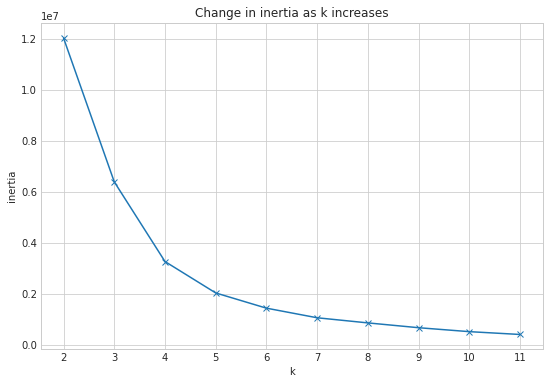

In [282]:
# what value of k would be reasonable? (unscaled data)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [283]:
# lets try kmeans algorithm on unscaled data
kmeans = KMeans(3)
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [284]:
# create a new cluster column in dataframe X
X['cluster'] = kmeans.labels_
X['cluster'] = 'cluster_' + X['cluster'].astype(str)

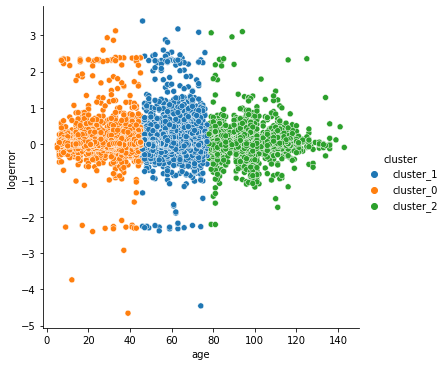

In [285]:
# lets visualize

sns.relplot(x = 'age', y = 'logerror', data = X, hue = 'cluster')

#### Clustering with scaled data

In [286]:
# now we will cluster again, but on scaled version of data:

X = zillow[['age', 'logerror' ]]
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [287]:
# kmeans algorithm on scaled data

kmeans = KMeans(3)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [288]:
X_scaled['cluster'] = kmeans.labels_
X_scaled['cluster'] = 'cluster_' + X_scaled['cluster'].astype(str)

In [289]:
# we can also create a cluster_scaled column on X (if we want to visualize in unscaled space)

X['scaled_cluster'] = kmeans.labels_
X['scaled_cluster'] = 'cluster_' + X['scaled_cluster'].astype(str)

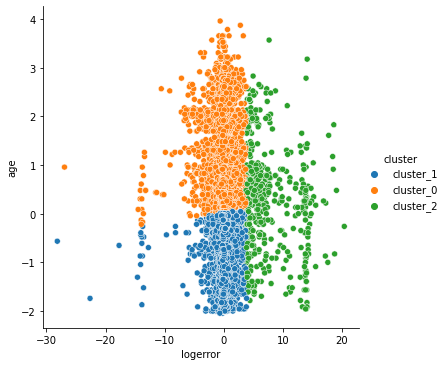

In [290]:
sns.relplot(x = 'logerror', y = 'age', data = X_scaled, hue = 'cluster')

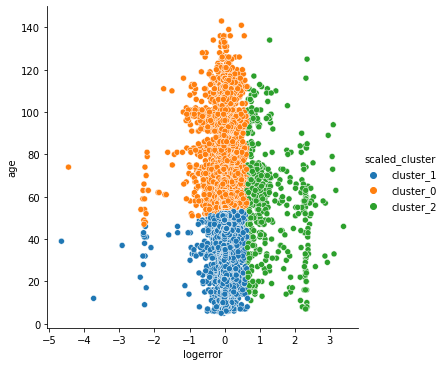

In [291]:
# visualized scaled cluster in unscaled space
sns.relplot(x = 'logerror', y = 'age', data = X, hue = 'scaled_cluster')

### Scaling takeaways for clustering:
- If the data is unscaled and variables have different variances, then clusters tend to be formed along the variables with greater variances (e.g. along 'age' variable).
- Scale data when working with disparate variables having different magnitude (e.g. tax value and logerror)

#### What is the mean logerror for these three clusters?

In [292]:
zillow['scaled_cluster'] = kmeans.labels_

In [293]:
# mean logerror in cluster 0

zillow[zillow.scaled_cluster == 0].logerror.mean()

0.005332769605413653

In [294]:
# mean logerror in cluster 1

zillow[zillow.scaled_cluster == 1].logerror.mean()

0.010589812293991275

In [295]:
# mean logerror in cluster 2

zillow[zillow.scaled_cluster == 2].logerror.mean()

1.2655742270688242

### Are these three logerrors in the 3 clusters statistically and practically different?

### Another more edge case example showing effect of scaling:

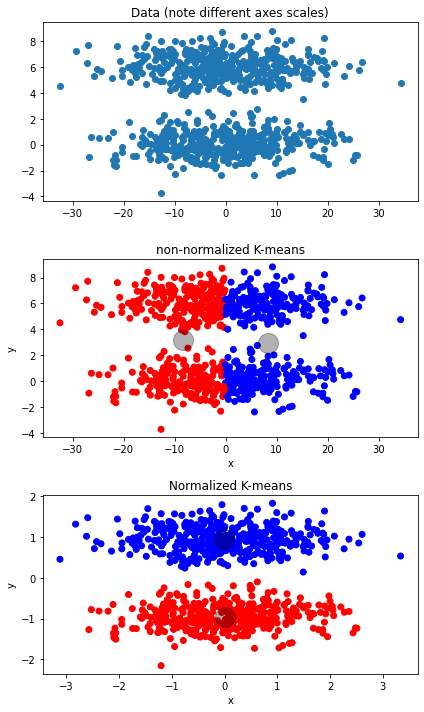

In [246]:
import random
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans


rnorm = np.random.randn
x1 = rnorm(800) * 10  
y1 = np.concatenate([rnorm(400), rnorm(400) + 6])
df = pd.DataFrame()
df['x'] = x1
df['y'] = y1


scaler = StandardScaler()
cols = ['x', 'y']
df_scaled = df.copy()
df_scaled[cols] = scaler.fit_transform(df[cols])

X = df[cols]
X_scaled = df_scaled[cols]

fig, axes = plt.subplots(3, 1, figsize=(6,10))

axes[0].scatter(x1, y1)
axes[0].set_title('Data (note different axes scales)')

km = KMeans(2)

clusters = km.fit_predict(X)
centroids = pd.DataFrame(km.cluster_centers_, columns = ['x', 'y'])

axes[1].scatter(df.x, df.y, c=clusters, cmap='bwr')
centroids.plot.scatter(x='x', y= 'y', ax=axes[1], marker='o', alpha = 0.3, s=400, c='k')
axes[1].set_title('non-normalized K-means')

clusters = km.fit_predict(X_scaled)
centroids = pd.DataFrame(km.cluster_centers_, columns = ['x', 'y'])
# df['cluster'] = km.predict(X_scaled)
# centroids = df.groupby('cluster')['x', 'y'].mean()
# centroids

axes[2].scatter(df_scaled.x, df_scaled.y, c=clusters, cmap='bwr')
centroids.plot.scatter(x= 'x', y= 'y', ax=axes[2], marker='o', alpha = 0.3, s=400, c='k')


axes[2].set_title('Normalized K-means')
plt.tight_layout()

- For unscaled data, the clusters are formed along with variables with greater variance.
- When data is scaled, the clusters seems to be separated as desired